In [1]:
%matplotlib notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

create a dates dataset

np.random.randn(6, 4) to gen a norally distributed r.v.

In [3]:
dates = pd.date_range('20140101', periods = 6)
df = pd.DataFrame(np.random.randn(6, 4), index = dates, columns = list('ABCD'))

In [4]:
df

,A,B,C,D
2014-01-01,-0.220496,-0.795761,0.073296,-1.402393
2014-01-02,0.297683,-0.794821,0.105350,1.628424
2014-01-03,-0.097817,0.865610,-0.253718,-1.746750
2014-01-04,-1.368866,0.733575,1.211623,-0.395342
2014-01-05,1.867815,0.980242,-0.503409,-2.022562
2014-01-06,-1.048301,0.836544,0.689084,-0.499021


empirical rule for normal distributed r.v., 68%, 95%, 99%

In [6]:
df.apply(lambda x: x.max() - x.min())

A    3.236681
B    1.776003
C    1.715032
D    3.650986
dtype: float64

In [7]:
df.A.min()
#min value of column A

-1.3688660366739362

In [8]:
df.A.max()

1.8678151257060784

# Statistics Functions
Statistics Datasets:
https://drive.google.com/open?id=1PqbZGnluGWbs7SFbUWzphv1c5oUcoKG6

In [9]:
import os

In [15]:
data = pd.read_csv('data_stats/ozone.csv')

# alternative (don't know how to do that)
# data = pd.read_csv(os.path.join('..', '..', 'sth' ))
# ..let you go up a directory

In [16]:
data.head(n=5)

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67,5,1
1,36.0,118.0,8.0,72,5,2
2,12.0,149.0,12.6,74,5,3
3,18.0,313.0,11.5,62,5,4
4,NaN,NaN,14.3,56,5,5


In [17]:
data.columns

Index(['Ozone', 'Solar.R', 'Wind', 'Temp', 'Month', 'Day'], dtype='object')

In [18]:
for x in data.columns.values:
    print(x)

Ozone
Solar.R
Wind
Temp
Month
Day


In [20]:
tmp = data.ix[0:1]
print(tmp.head())

   Ozone  Solar.R  Wind  Temp  Month  Day
0   41.0    190.0   7.4    67      5    1
1   36.0    118.0   8.0    72      5    2


In [21]:
data.ix?

In [23]:
print(len(data))
# #rows in the data

153


In [24]:
print(data.Ozone.mean())

42.12931034482759


In [25]:
print(data.Ozone.describe())

count    116.000000
mean      42.129310
std       32.987885
min        1.000000
25%       18.000000
50%       31.500000
75%       63.250000
max      168.000000
Name: Ozone, dtype: float64


In [30]:
print(data.median())
# print(data.mode())
# print(data.min())
# print(data.max())

Ozone       31.5
Solar.R    205.0
Wind         9.7
Temp        79.0
Month        7.0
Day         16.0
dtype: float64


In [40]:
# restrict to specific data frame, and calculate mean of a specific variable within that data frame
print(data[(data.Ozone > 31) & (data.Temp > 90)]['Solar.R'].mean())
# for when both is true

212.8


In [39]:
print(data[(data.Ozone > 31) | (data.Temp > 90)]['Solar.R'].mean())
# | means or
# for either or os true

217.79661016949152


In [44]:
print(data[data.Month ==6].Temp.mean())
# equal for logic ==; not equal != (as in stata)

79.1


See if anything is biasing the data

In [45]:
print(data[data.Month ==6].Temp.describe())

count    30.000000
mean     79.100000
std       6.598589
min      65.000000
25%      76.000000
50%      78.000000
75%      82.750000
max      93.000000
Name: Temp, dtype: float64


In [46]:
print(data.Temp.describe())

count    153.000000
mean      77.882353
std        9.465270
min       56.000000
25%       72.000000
50%       79.000000
75%       85.000000
max       97.000000
Name: Temp, dtype: float64


In [47]:
print(data.Temp.var())

89.59133126934981


In [48]:
print(data.Temp.std())

9.465269740971454


In [49]:
print(data.corr())

            Ozone   Solar.R      Wind      Temp     Month       Day
Ozone    1.000000  0.348342 -0.601547  0.698360  0.164519 -0.013226
Solar.R  0.348342  1.000000 -0.056792  0.275840 -0.075301 -0.150275
Wind    -0.601547 -0.056792  1.000000 -0.457988 -0.178293  0.027181
Temp     0.698360  0.275840 -0.457988  1.000000  0.420947 -0.130593
Month    0.164519 -0.075301 -0.178293  0.420947  1.000000 -0.007962
Day     -0.013226 -0.150275  0.027181 -0.130593 -0.007962  1.000000


In [53]:
print(data.corr(method = 'spearman'))

            Ozone   Solar.R      Wind      Temp     Month       Day
Ozone    1.000000  0.348186 -0.590155  0.774043  0.137861 -0.056198
Solar.R  0.348186  1.000000 -0.000977  0.207428 -0.127823 -0.152308
Wind    -0.590155 -0.000977  1.000000 -0.446541 -0.157849  0.037569
Temp     0.774043  0.207428 -0.446541  1.000000  0.372075 -0.157068
Month    0.137861 -0.127823 -0.157849  0.372075  1.000000 -0.007852
Day     -0.056198 -0.152308  0.037569 -0.157068 -0.007852  1.000000


sklearn is good for machine learning, but we start from statsmodels

Stats Book for R (python data set):
http://www-bcf.usc.edu/~gareth/ISL/

*****
http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv
*****

StatsModels: http://www.statsmodels.org/stable/index.html
sklearn: http://scikit-learn.org/stable/

`download`: data directely from web

In [60]:
advertising = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col = 0)
# add index_col = 0 to set the first column, remove a column to make the csv file in right order

In [62]:
print(advertising.head())

      TV  radio  newspaper  sales
1  230.1   37.8       69.2   22.1
2   44.5   39.3       45.1   10.4
3   17.2   45.9       69.3    9.3
4  151.5   41.3       58.5   18.5
5  180.8   10.8       58.4   12.9


In [64]:
advertising.shape
# #rows and #columns

(200, 4)

<IPython.core.display.Javascript object>


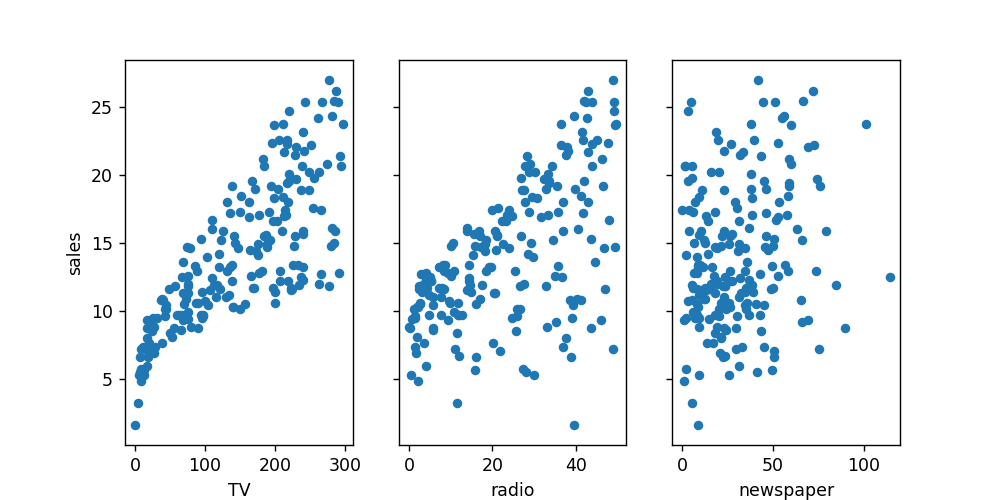

In [73]:
fig, axs = plt.subplots(1, 3, sharey=True)
# 3 scatplots; sharey is true maintains each subplot with same y axis
advertising.plot(kind='scatter', x='TV', y='sales', ax=axs[0], figsize=[8,4])
# 1st scatplot
advertising.plot(kind='scatter', x='radio', y='sales', ax=axs[1], figsize=[8,4])
advertising.plot(kind='scatter', x='newspaper', y='sales', ax=axs[2], figsize=[8,4])

##  linear regression

In [74]:
import statsmodels.formula.api as smf

In [78]:
lm = smf.ols(formula='sales ~ TV + radio + newspaper', data = advertising).fit()

In [76]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Fri, 12 Jan 2018   Prob (F-statistic):           1.47e-42
Time:                        15:18:53   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [82]:
lm.params

Intercept    2.938889
TV           0.045765
radio        0.188530
newspaper   -0.001037
dtype: float64

## prediction

In [85]:
X_new = pd.DataFrame({'TV': [50000], 'radio': [10000], 'newspaper': [5000]})

In [86]:
X_new.head()

,TV,newspaper,radio
0,50000,5000,10000


In [87]:
lm.predict(X_new)

0    4171.283866
dtype: float64

In [93]:
lm.conf_int()
# Returns the confidence interval of the fitted parameters.

,0,1
Intercept,2.323762,3.554016
TV,0.043014,0.048516
radio,0.171547,0.205513
newspaper,-0.012616,0.010541


Day 1 Jupyter Notebook Reference File; 
Day 2 Jupyter Notebook Reference File - Statistics:

https://drive.google.com/open?id=1iEzUh6Ih9pXvk66vNeAA3AVKNihl-nMD